### Project Title: Uber Fare Prediction 

### Description

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately


### Problem Statement


This case study is to predict the price of the Uber ride from a given pickup point to the agreed dropoff location. Evaluating the models & compare their respective scores like R2, RMSE, etc

### The datset contains the following fields:

key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

Import libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pylab

In [6]:
#pip install statsmodels

In [7]:
import statsmodels.api as sm


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn import metrics

In [10]:
import math

In [11]:
from statsmodels.tools.eval_measures import rmse

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn import metrics

In [14]:
from sklearn import preprocessing

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
#from keras.models import Sequential

In [20]:
#from keras.layers import Dense


### Read data

In [21]:
# Here we are importing dataset by using pandas

data=pd.read_csv(r'uber.csv')

In [22]:
data

Unnamed: 0                            key  fare_amount   
0         24238194    2015-05-07 19:52:06.0000003          7.5  \
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude   
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354  \
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

In [23]:
# Alwats create a copy

df=data.copy()

In [24]:
# See the complete dataframe

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [25]:
df.head()

Unnamed: 0                            key  fare_amount   
0    24238194    2015-05-07 19:52:06.0000003          7.5  \
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude   
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354  \
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [27]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [28]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [29]:
df.shape

(200000, 7)

### EDA

In [30]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [32]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude   
count  200000.000000     200000.000000    200000.000000      199999.000000  \
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.923890         1.684535  
std            6.794829         1.385997  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

In [33]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [34]:
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude   
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354  \
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [35]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

From the above output, we see that the data type of 'pickup_datetime' is 'object

But according to data definition, 'pickup_datetime'is a date time stamp variable, which is wrongly interpreted as 'object', so we will convert this variable data type to 'datetime'.

### change the Incorrect data types

In [36]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

# For datetime64[ns] types NaT represents missing values

### Recheck the data types

In [37]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

 we will extract time feature from the 'pickup_datetime' 
 we will add a variable which measures the distance between pickup and drop

In [38]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

### Here we are going to use Heversine formula to calculate the distance between two points and journey, using the longitude and latitude values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
 7   hour               200000 non-null  int32              
 8   day                200000 non-null  int32              
 9   month              200000 non-null  int32              
 10  year               200000 non-null  int32              
 11  dayofweek          200000 non-null  int32              
dtypes: datetime64[ns, UTC](1), flo

In [40]:
from math import *

### Heversine Formula
hav(0)=sin**2(0/2)

function to calculate the travel distance from the longitudes and latitudes

In [41]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [42]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy())
                

In [43]:
# Check the dataset

df.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude   
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354  \
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month   
0         -73.999512         40.723217                1    19    7      5  \
1         -73.994710         40.750325                1    20   17      7   
2         -73.962565         40.772647                1    21   24      8   
3         -73.965316         40.803349                3     8   26      6   
4         -73.973082         40.761247                5    17   28      8   

   year  dayofweek  dist_travel_km  
0  2015          3        1.683323  
1  2009          4        2.457590  
2  2009          0        5.036377  
3  2009          4        1.661683  
4  2014          3        4.475450

now we can drop the pickup_datetime variable beacause now we got the distance 
and it becomes redundant now.

In [44]:
# drop the column 'pickup_daetime' using drop()

# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime', axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   hour               200000 non-null  int32  
 7   day                200000 non-null  int32  
 8   month              200000 non-null  int32  
 9   year               200000 non-null  int32  
 10  dayofweek          200000 non-null  int32  
 11  dist_travel_km     199999 non-null  float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 14.5 MB


as now we get the required variable and in the required in datatype so now we can move further.

In [46]:
df.describe().transpose()

count         mean         std          min   
fare_amount        200000.0    11.359955    9.901776   -52.000000  \
pickup_longitude   200000.0   -72.527638   11.437787 -1340.648410   
pickup_latitude    200000.0    39.935885    7.720539   -74.015515   
dropoff_longitude  199999.0   -72.525292   13.117408 -3356.666300   
dropoff_latitude   199999.0    39.923890    6.794829  -881.985513   
passenger_count    200000.0     1.684535    1.385997     0.000000   
hour               200000.0    13.491335    6.515531     0.000000   
day                200000.0    15.704670    8.687409     1.000000   
month              200000.0     6.281795    3.438925     1.000000   
year               200000.0  2011.742440    1.856397  2009.000000   
dayofweek          200000.0     3.048425    1.946946     0.000000   
dist_travel_km     199999.0    20.855350  382.964642     0.000000   

                           25%          50%          75%           max  
fare_amount           6.000000     8.500000    12.500000    499.000000  
pickup_longitude    -73.992065   -73.981823   -73.967154     57.418457  
pickup_latitude      40.734796    40.752592    40.767158   1644.421482  
dropoff_longitude   -73.991407   -73.980093   -73.963658   1153.572603  
dropoff_latitude     40.733823    40.753042    40.768001    872.697628  
passenger_count       1.000000     1.000000     2.000000    208.000000  
hour                  9.000000    14.000000    19.000000     23.000000  
day                   8.000000    16.000000    23.000000     31.000000  
month                 3.000000     6.000000     9.000000     12.000000  
year               2010.000000  2012.000000  2013.000000   2015.000000  
dayofweek             1.000000     3.000000     5.000000      6.000000  
dist_travel_km        1.215222     2.120992     3.875169  16409.239135

The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.

Note that the minimum amount is -52 and maximum is 499. Ideally fare amount should not be less that 2.5 dollars, which is the minimum value set for fares. Also the minimum count of passengers is 0, which isn't a practical scenario. We will deal with such values as we progress the case study.

In [47]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

AS, there are no categorical varaibles.


### Discover of outliers

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease. Let us detect the extreme values in the data.

The following can be considered as outliers in this case study:

1. Amount < -52
2. Trips with travel distance less than or equal to 0, and more than 130Kms
3. Trips where 90< latitude <-90, 180 < longitude < -180

1. We have seen that there are instances of fare_amount less that 0 as well in the data set, where as the minimum fare for any trip is -52 dollars, hence we will remove such observations. We have already seen that the max fare is 499 in the data set.

In [48]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude   
0          7.5        -73.999817        40.738354         -73.999512  \
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek   
0         40.723217                1    19    7      5  2015          3  \
1         40.750325                1    20   17      7  2009          4   
2         40.772647                1    21   24      8  2009          0   
3         40.803349                3     8   26      6  2009          4   
4         40.761247                5    17   28      8  2014          3   

   dist_travel_km  
0        1.683323  
1        2.457590  
2        5.036377  
3        1.661683  
4        4.475450

In [49]:
df.fare_amount.min()

-52.0

### sns.set(rc={' figure.figsize ':(11.7,8.27))})

<Axes: >

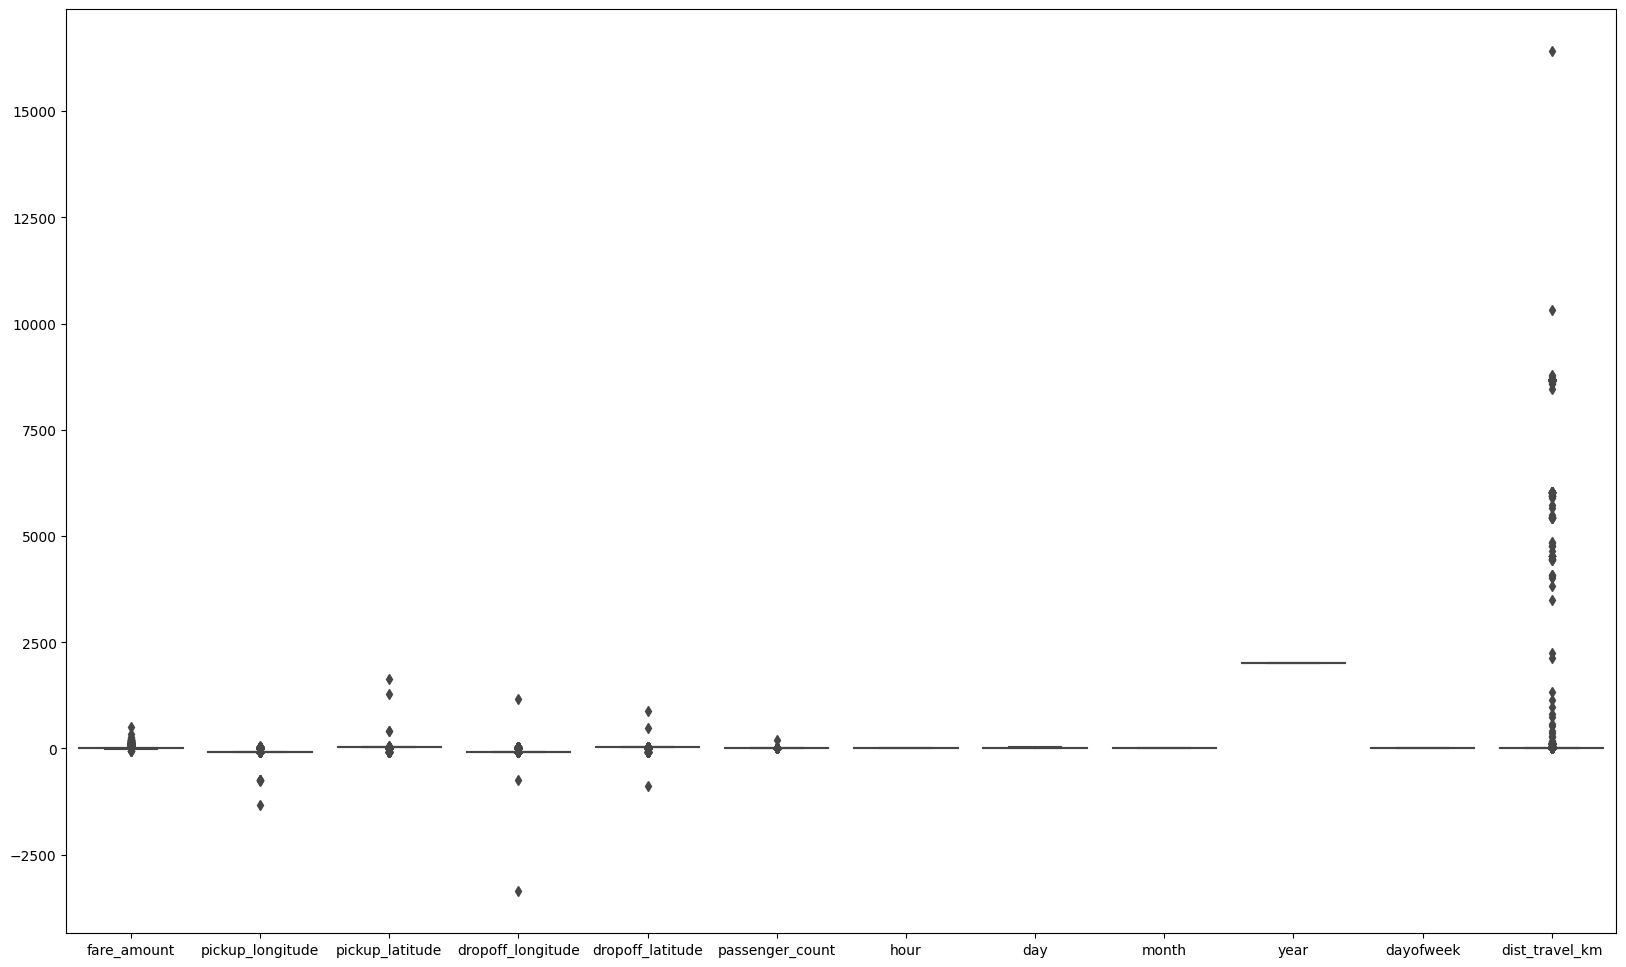

In [50]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df)

In [51]:
medianFiller = lambda x : x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis = 0)

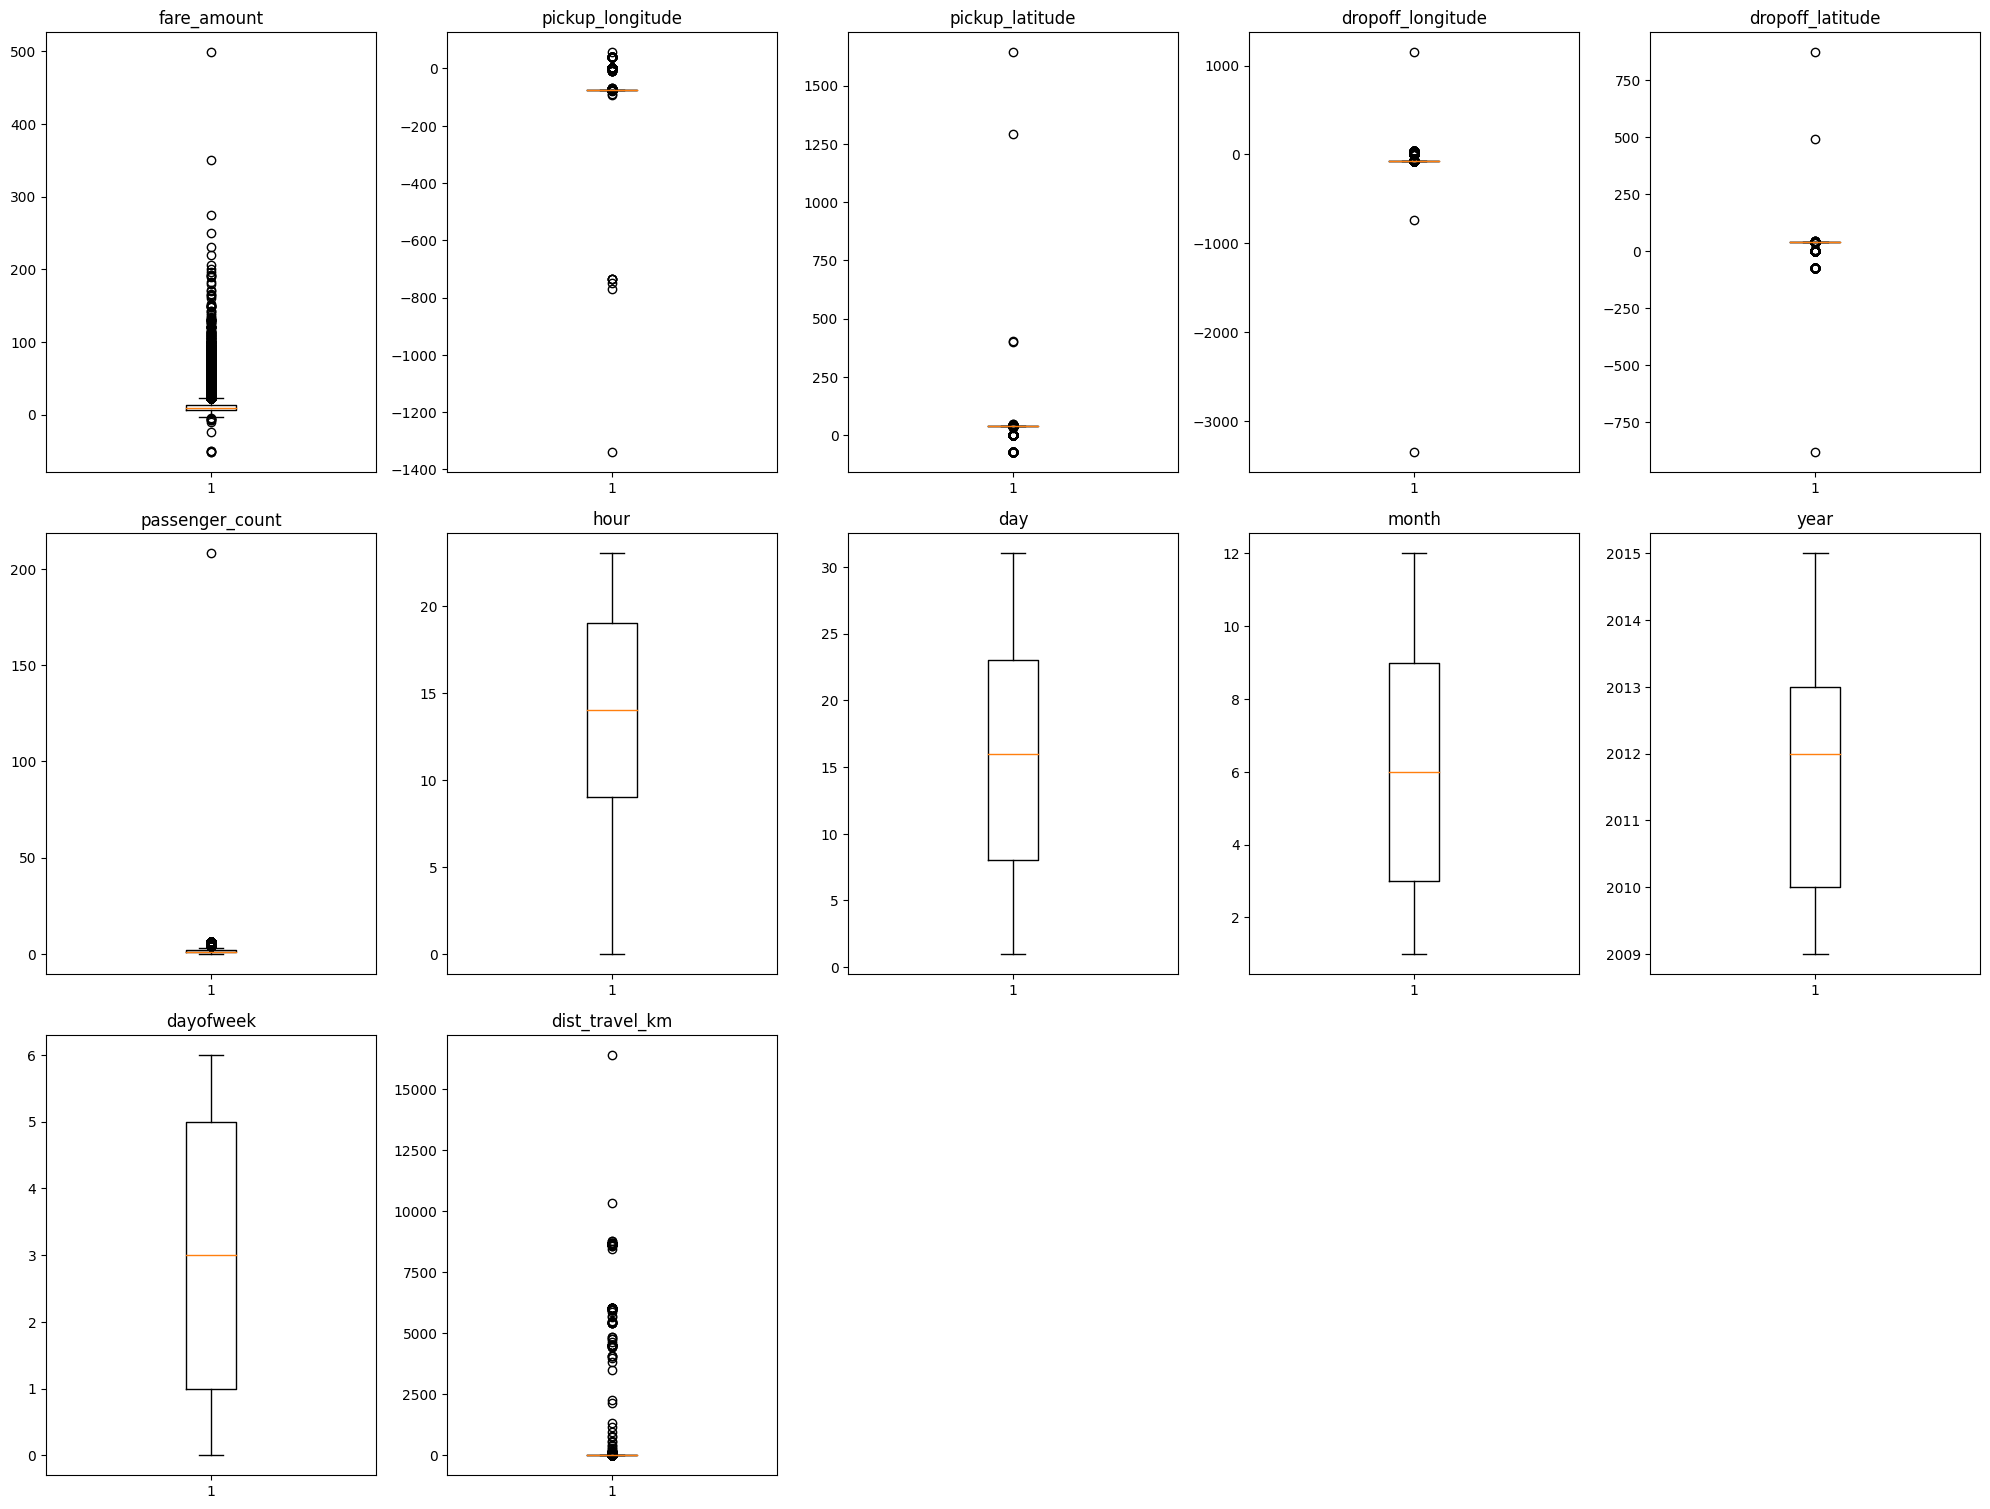

In [52]:
# outliers detection using boxplot

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [53]:
df.shape

(200000, 12)

In [54]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude   
0          7.5        -73.999817        40.738354         -73.999512  \
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek   
0         40.723217                1    19    7      5  2015          3  \
1         40.750325                1    20   17      7  2009          4   
2         40.772647                1    21   24      8  2009          0   
3         40.803349                3     8   26      6  2009          4   
4         40.761247                5    17   28      8  2014          3   

   dist_travel_km  
0        1.683323  
1        2.457590  
2        5.036377  
3        1.661683  
4        4.475450

In [55]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1


In [56]:
df = treat_outliers_all(df, df.iloc[:, 0::])

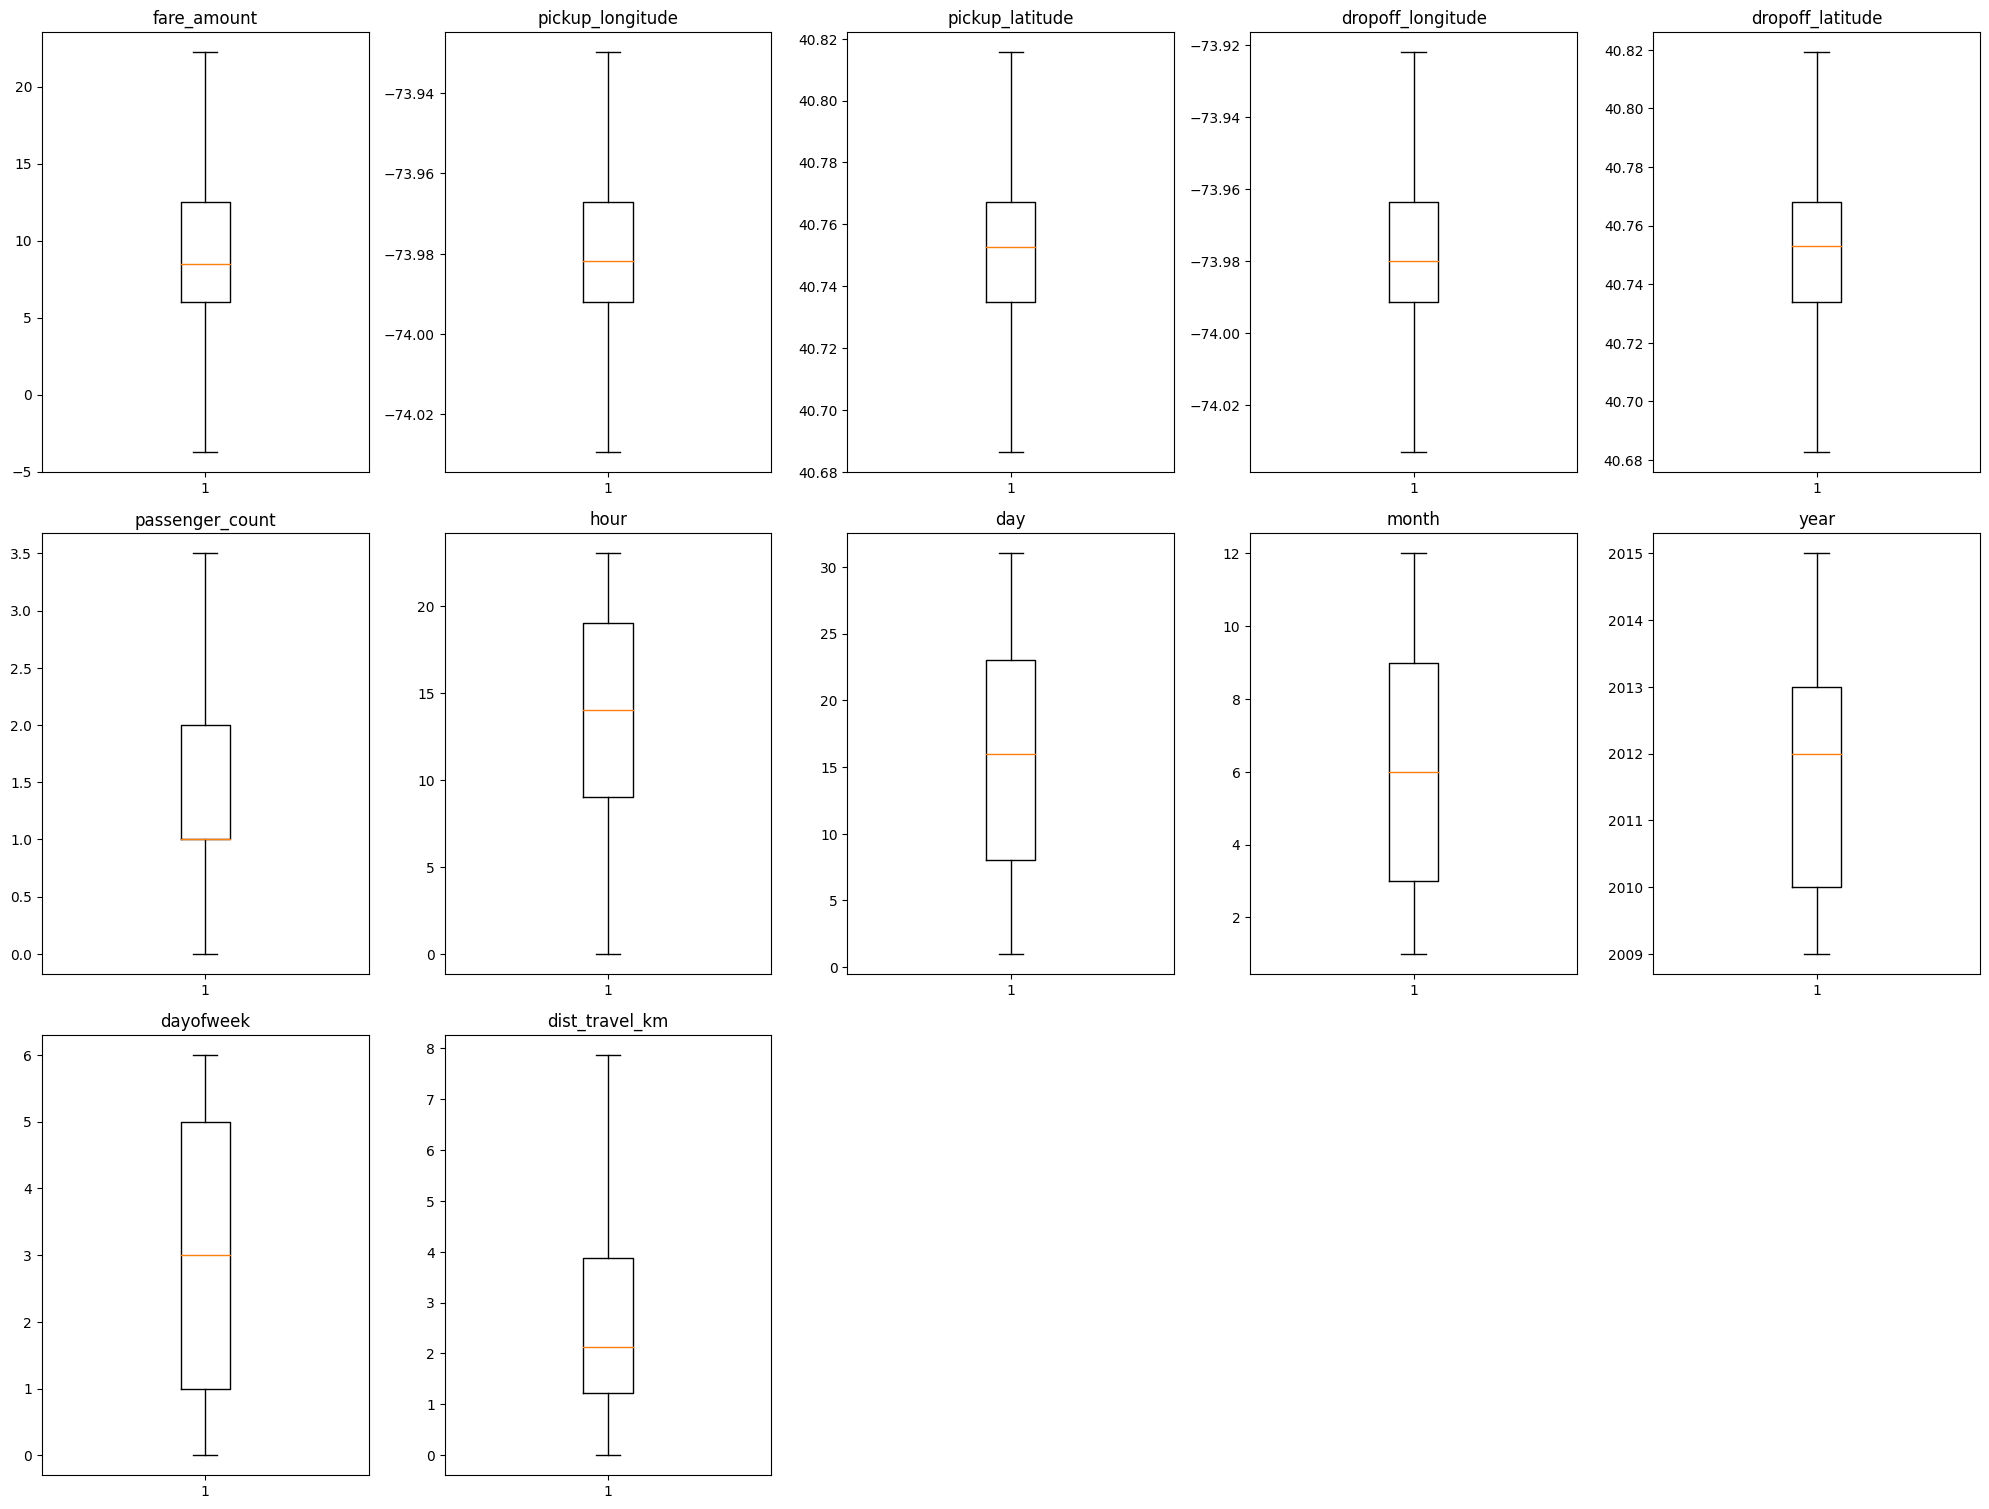

In [57]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [58]:
df.shape

(200000, 12)

1. Remove the observations with travel distance more than 130 kms.As seen from descriptive stats there are obs with travel distance more than 130 km, as that is the limit for trips.

In [59]:
#We will only keep the observation where travel distance is less than or equal to 130

df = df.loc[(df.dist_travel_km>=1) | (df.dist_travel_km <=130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


1. Remove the observations with unreal longitude and latitude values , that is , 90< latitude <-90, 180 < longitude < -180

In [60]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [61]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [62]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude   
0          7.5        -73.999817        40.738354         -73.999512  \
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.929786        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek   
0         40.723217              1.0    19    7      5  2015          3  \
1         40.750325              1.0    20   17      7  2009          4   
2         40.772647              1.0    21   24      8  2009          0   
3         40.803349              3.0     8   26      6  2009          4   
4         40.761247              3.5    17   28      8  2014          3   

   dist_travel_km  
0        1.683323  
1        2.457590  
2        5.036377  
3        1.661683  
4        4.475450

In [63]:
df.shape

(200000, 12)

### Missing Values

In [64]:
# sort the variables on the basis of total null values in the variable

# 'isnull().sum()' returns the number of missing values in each variable

# 'ascending = False' sorts values in the descending order

# the variable with highest number of missing values will appear first

Total = df.isnull().sum().sort_values(ascending = False)

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable

missing_data['Type'] = df[missing_data.index].dtypes
missing_data

Total  Percentage of Missing Values     Type
fare_amount            0                           0.0  float64
pickup_longitude       0                           0.0  float64
pickup_latitude        0                           0.0  float64
dropoff_longitude      0                           0.0  float64
dropoff_latitude       0                           0.0  float64
passenger_count        0                           0.0  float64
hour                   0                           0.0    int32
day                    0                           0.0    int32
month                  0                           0.0    int32
year                   0                           0.0    int32
dayofweek              0                           0.0    int32
dist_travel_km         0                           0.0  float64

### Visulize the missing values by heatmap

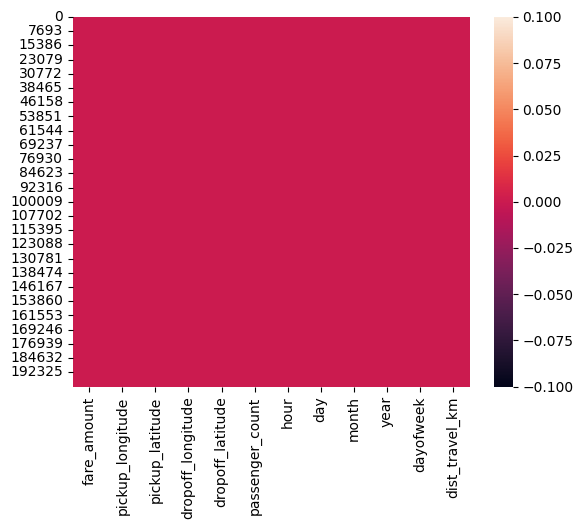

In [65]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 

sns.heatmap(df.isnull())

# display the plot

plt.show()

There is no missing values in the data

### Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near 1 indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

### compute a correlation matrix

use the corr() function to generate the correlation matrix of the numeric variables

In [66]:
corr = df.corr()

In [67]:
# print the correlation matrix
corr

fare_amount  pickup_longitude  pickup_latitude   
fare_amount           1.000000          0.154069        -0.110842  \
pickup_longitude      0.154069          1.000000         0.259497   
pickup_latitude      -0.110842          0.259497         1.000000   
dropoff_longitude     0.218675          0.425619         0.048889   
dropoff_latitude     -0.125871          0.073311         0.515735   
passenger_count       0.015778         -0.013213        -0.012889   
hour                 -0.023623          0.011579         0.029681   
day                   0.004534         -0.003204        -0.001553   
month                 0.030817          0.001169         0.001562   
year                  0.141277          0.010198        -0.014243   
dayofweek             0.013652         -0.024652        -0.042310   
dist_travel_km        0.844354          0.098073        -0.046826   

                   dropoff_longitude  dropoff_latitude  passenger_count   
fare_amount                 0.218675         -0.125871         0.015778  \
pickup_longitude            0.425619          0.073311        -0.013213   
pickup_latitude             0.048889          0.515735        -0.012889   
dropoff_longitude           1.000000          0.245674        -0.009303   
dropoff_latitude            0.245674          1.000000        -0.006329   
passenger_count            -0.009303         -0.006329         1.000000   
hour                       -0.046558          0.019764         0.020274   
day                        -0.004007         -0.003499         0.002712   
month                       0.002391         -0.001190         0.010351   
year                        0.011346         -0.009595        -0.009749   
dayofweek                  -0.003336         -0.031932         0.048550   
dist_travel_km              0.186532         -0.038873         0.009732   

                       hour       day     month      year  dayofweek   
fare_amount       -0.023623  0.004534  0.030817  0.141277   0.013652  \
pickup_longitude   0.011579 -0.003204  0.001169  0.010198  -0.024652   
pickup_latitude    0.029681 -0.001553  0.001562 -0.014243  -0.042310   
dropoff_longitude -0.046558 -0.004007  0.002391  0.011346  -0.003336   
dropoff_latitude   0.019764 -0.003499 -0.001190 -0.009595  -0.031932   
passenger_count    0.020274  0.002712  0.010351 -0.009749   0.048550   
hour               1.000000  0.004677 -0.003926  0.002156  -0.086947   
day                0.004677  1.000000 -0.017360 -0.012170   0.005617   
month             -0.003926 -0.017360  1.000000 -0.115859  -0.008786   
year               0.002156 -0.012170 -0.115859  1.000000   0.006113   
dayofweek         -0.086947  0.005617 -0.008786  0.006113   1.000000   
dist_travel_km    -0.038346  0.003083  0.011626  0.024269   0.027068   

                   dist_travel_km  
fare_amount              0.844354  
pickup_longitude         0.098073  
pickup_latitude         -0.046826  
dropoff_longitude        0.186532  
dropoff_latitude        -0.038873  
passenger_count          0.009732  
hour                    -0.038346  
day                      0.003083  
month                    0.011626  
year                     0.024269  
dayofweek                0.027068  
dist_travel_km           1.000000

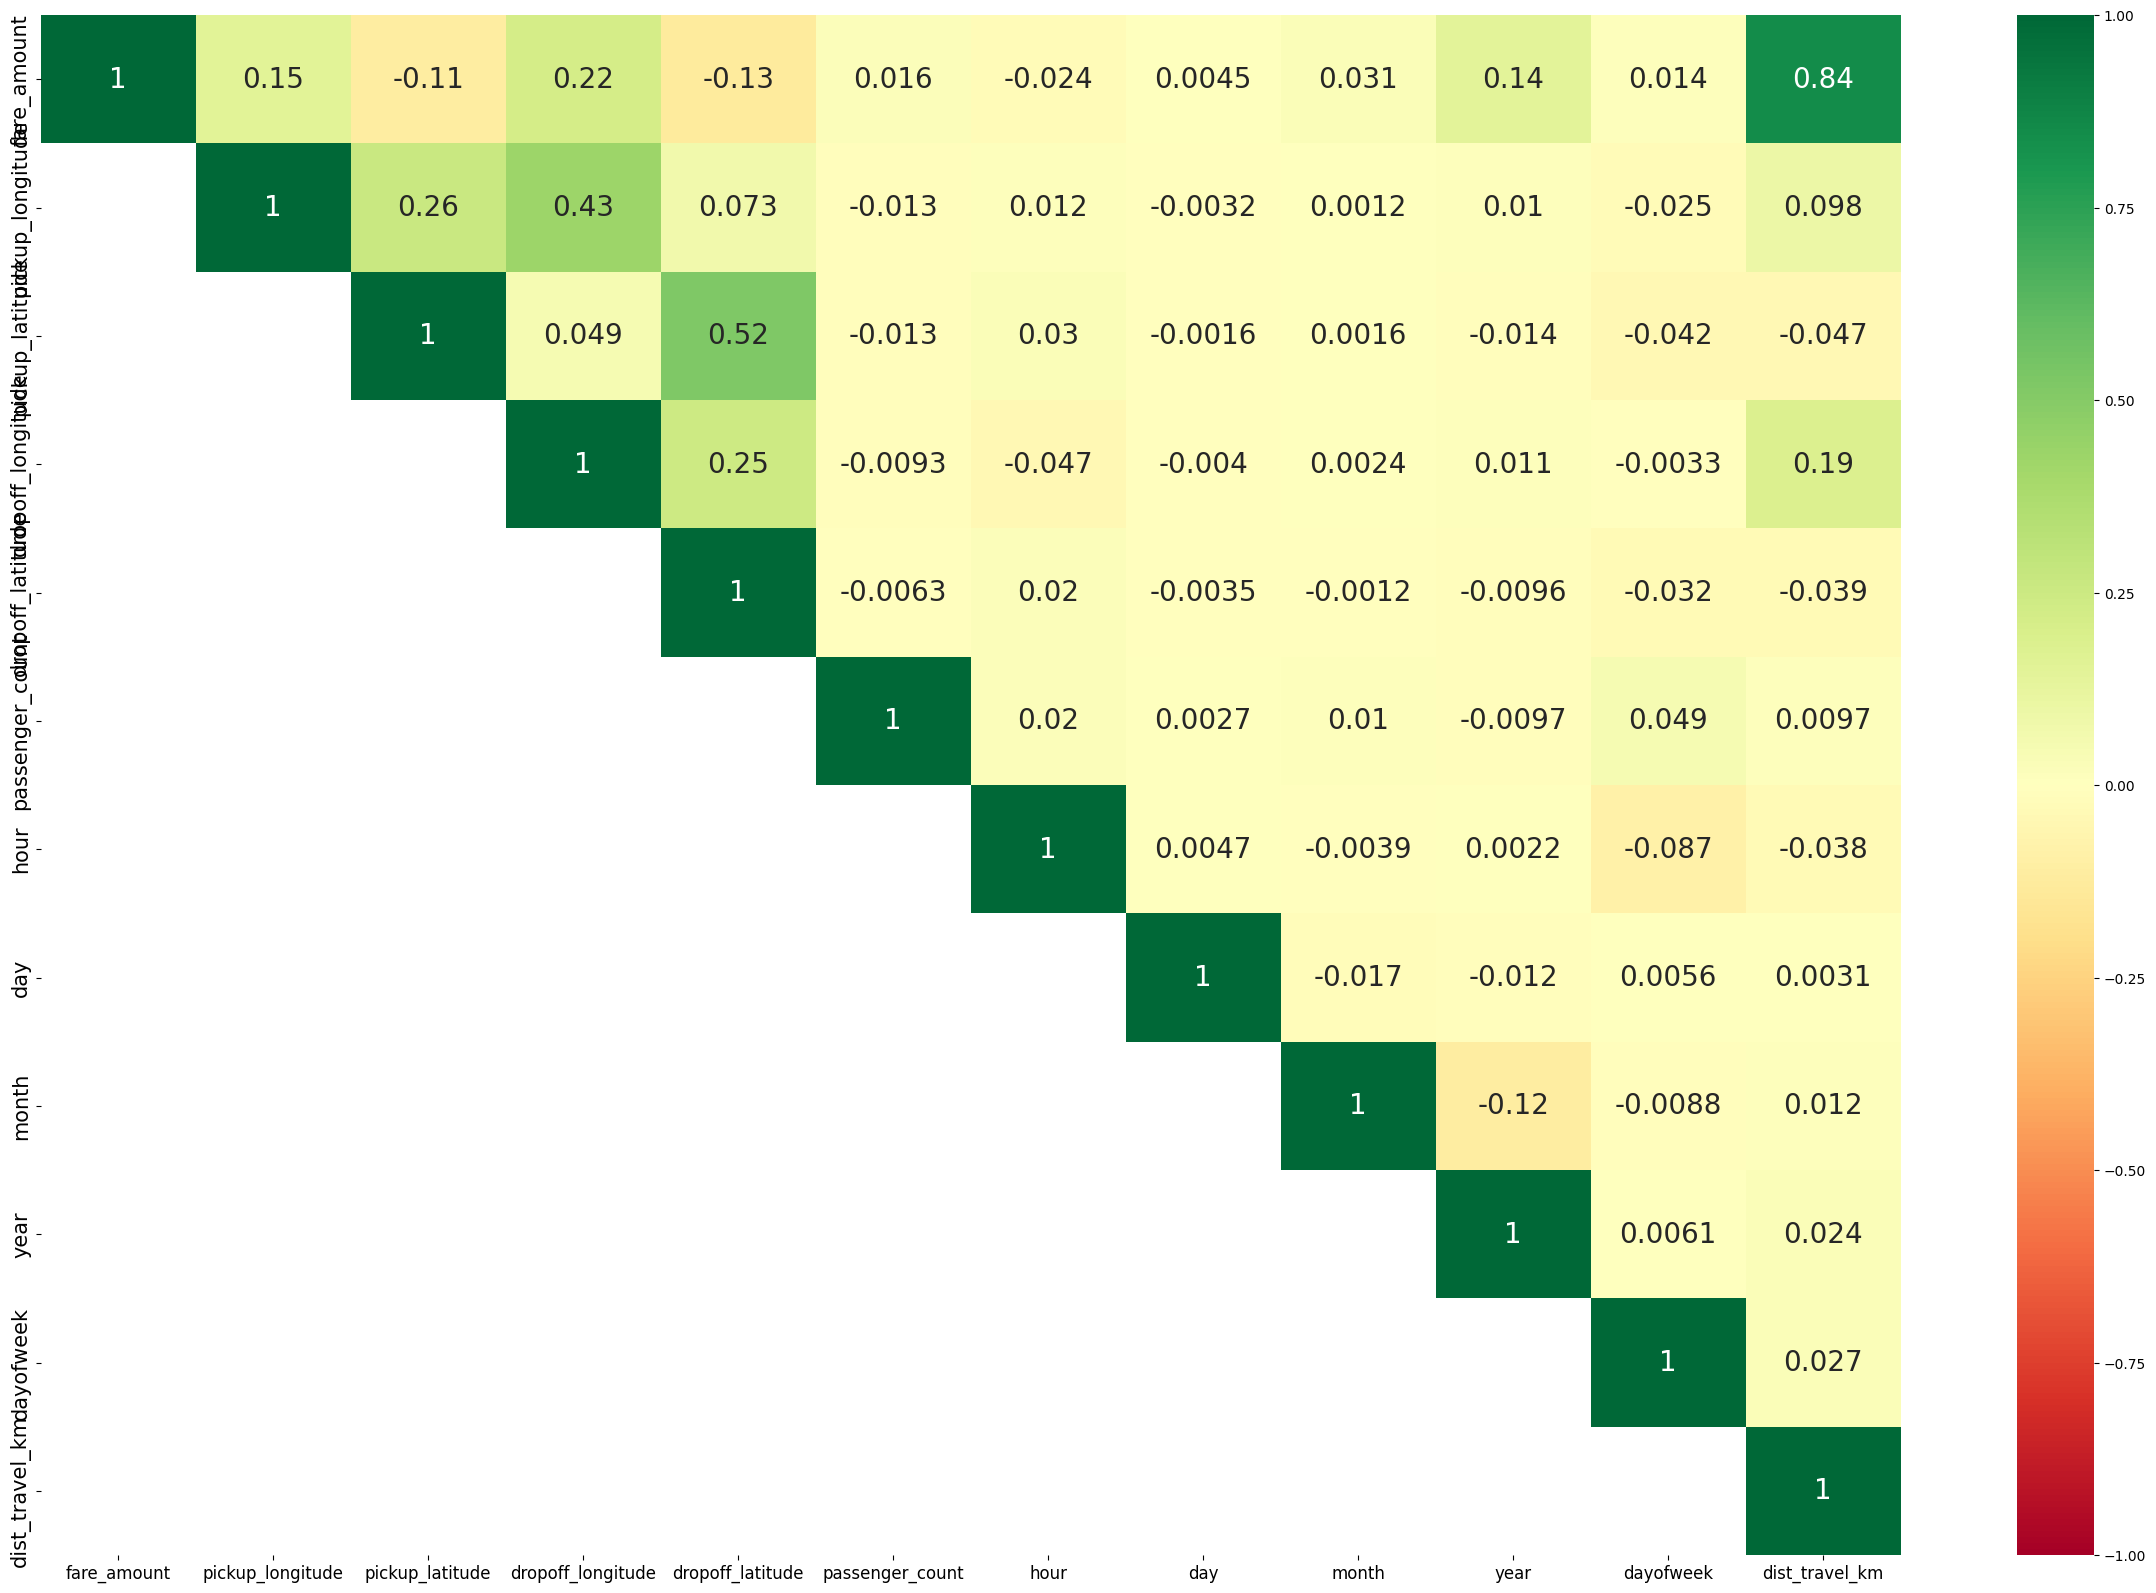

In [68]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'

plt.figure(figsize = (30, 20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix

mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k=-1)]=True

# plot the heat map
# corr: gives the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: masks the upper traingular matrix values

sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

The diagonal entries are all '1' which represents the correlation of the variable with itself. The dark green squares represent the variables with strong positive correlation. The dark red squares represent the variables with strong negative correlation.

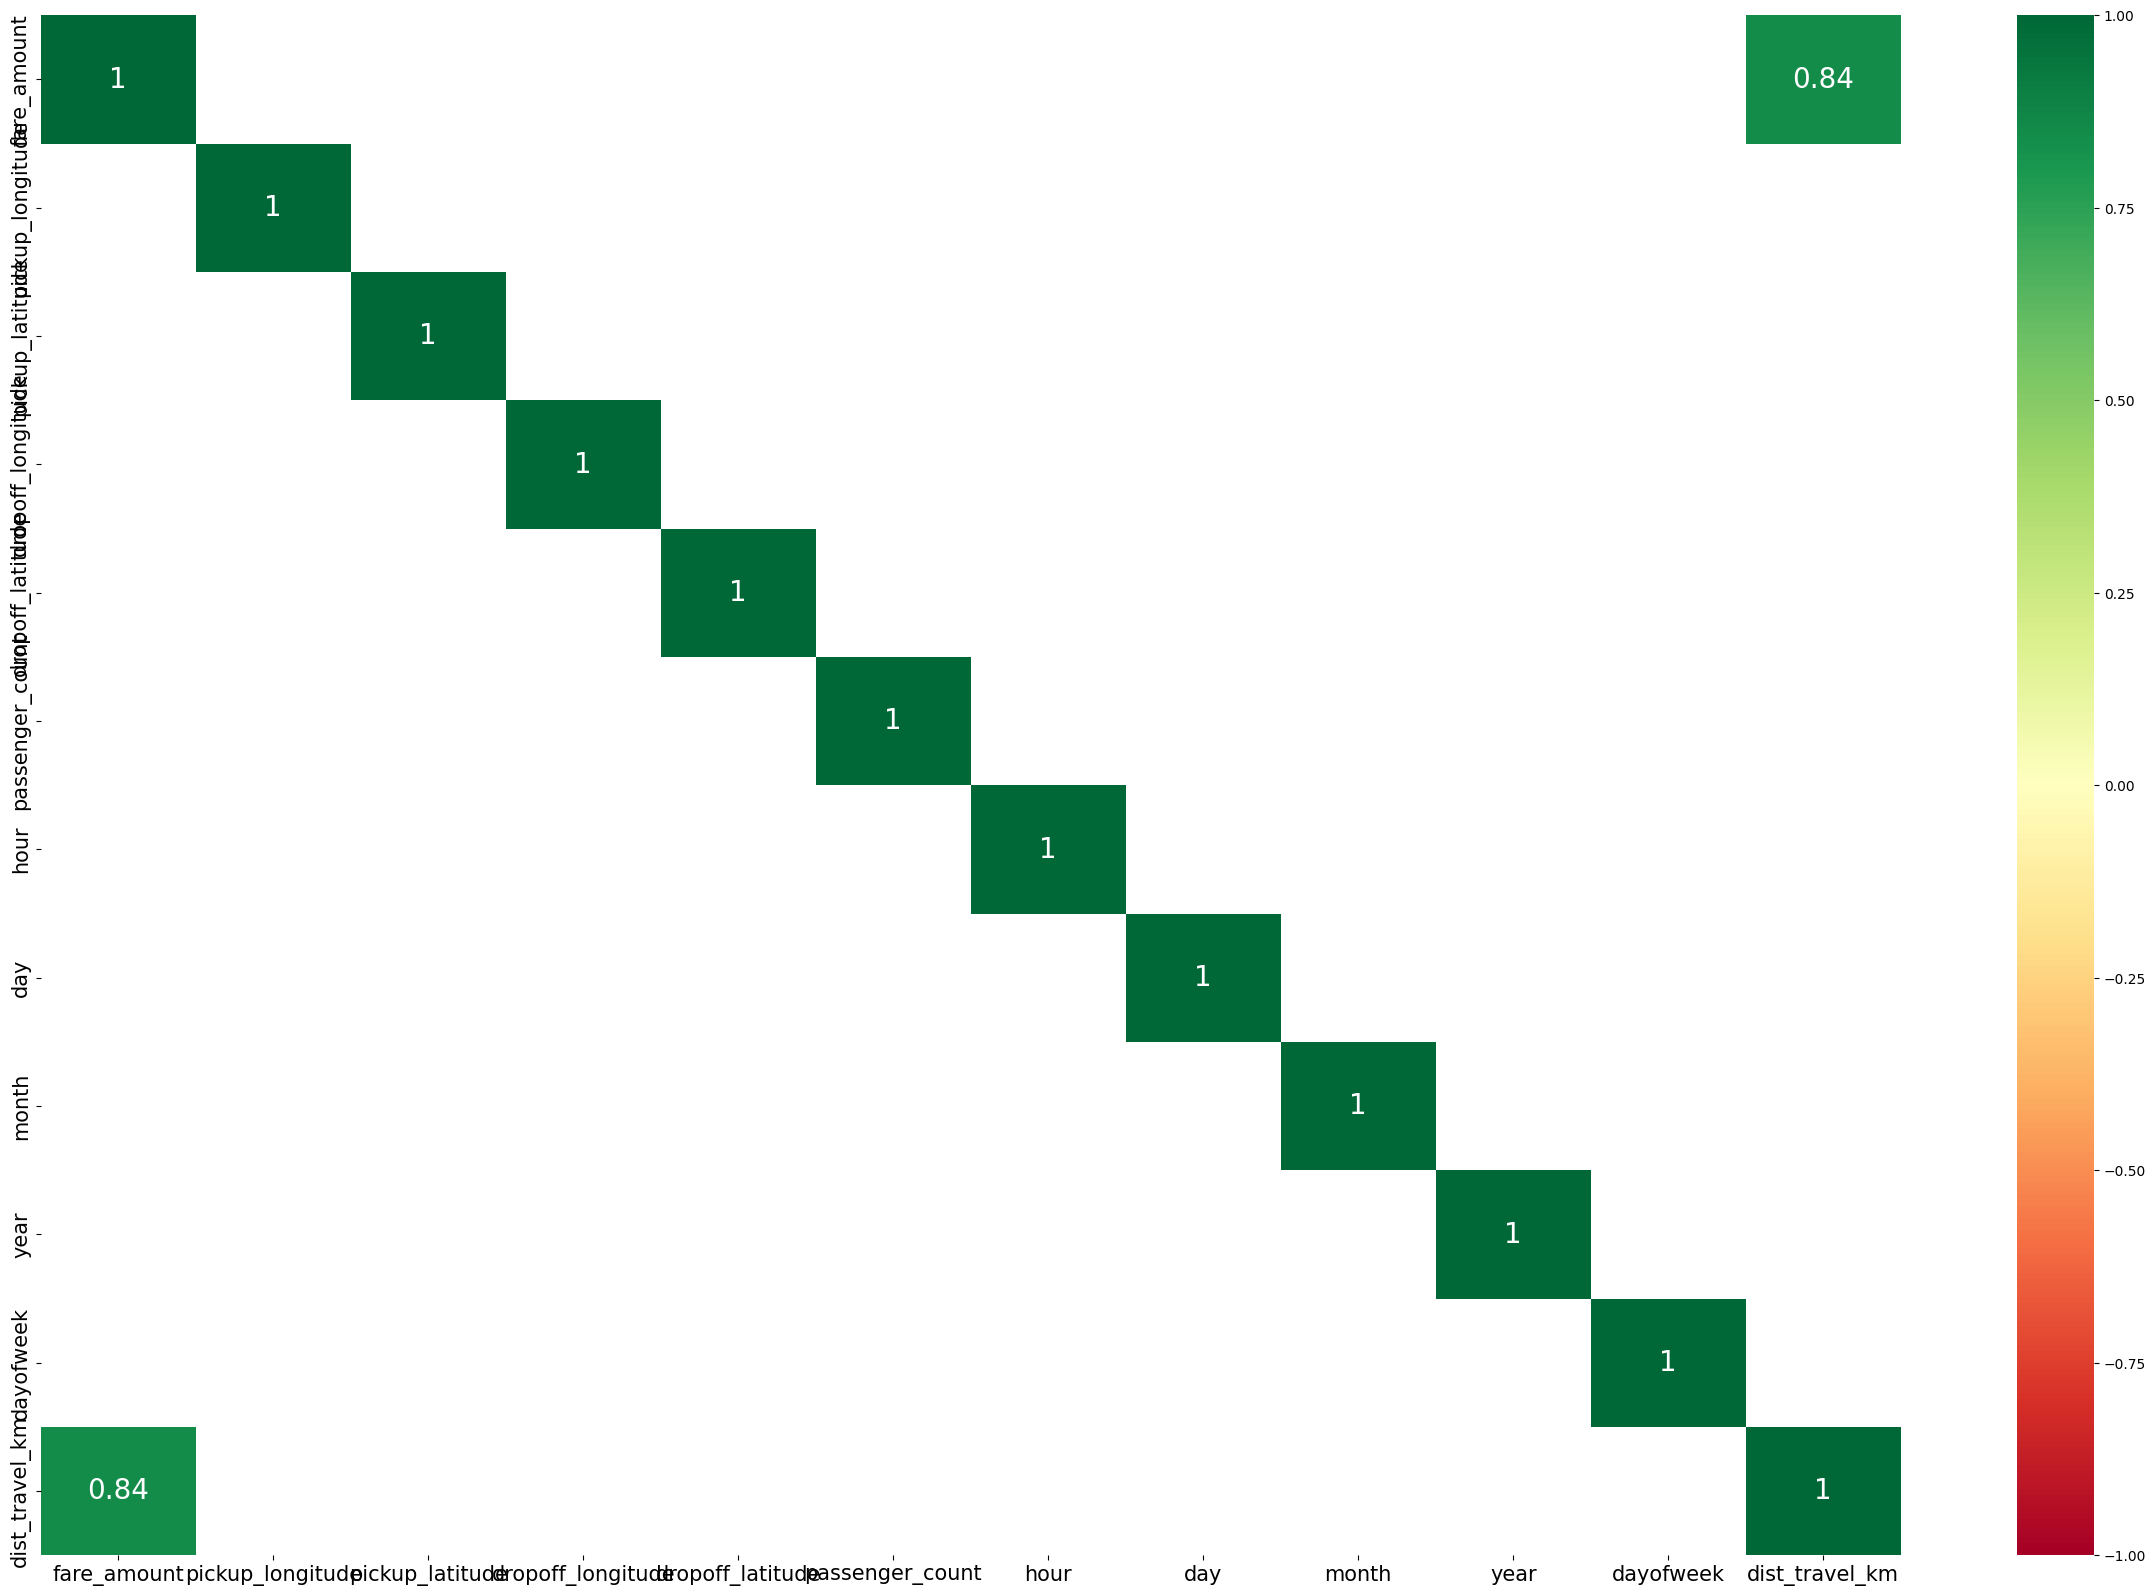

In [69]:
# set figure size

plt.figure(figsize=(30,20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.set(font_scale=2)

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})

# set the size of x and y axes labels
# set text size using 'fontsize'

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()


The above plot shows that there is highest positive correlation (= 0.83) between the variables 'longitude_of_pickup' and 'longitude_of_dropoff'. Also there is strong positive correlation between the pair latitude_of_pickup and latitude_of_dropoff. These variables may be involved in multicollinearity.
Following variable pairs have strong negative correlation in the dataset(longitude_of_pickup,latitude_of_pickup), (latitude_of_dropoff,longitude_of_pickup),(longitude_of_dropoff,latitude_of_pickup) and (longitude_of_dropoff, latitude_of_dropoff).

Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

### we are going to check the peak hours during weekdays
1. Weekdays
2. Weekends

### 1. Plot a countplot to check the peak hours during weekdays

<Axes: title={'center': 'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

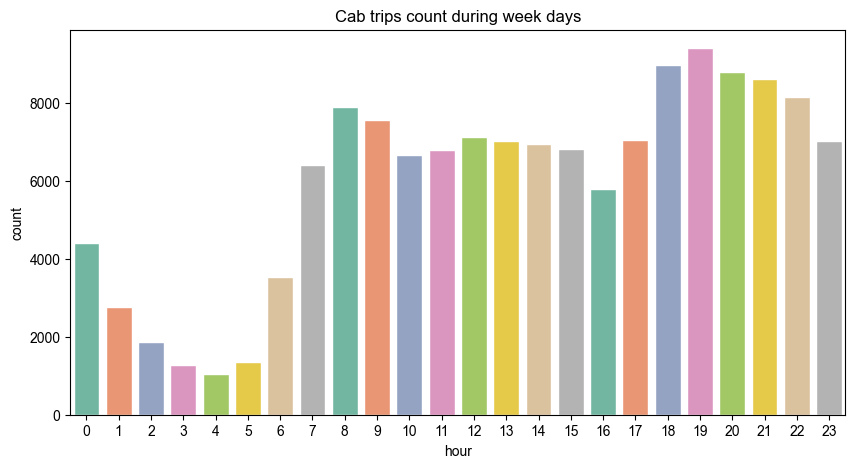

In [70]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot

plt.figure(figsize=(10,5))
plt.title('Cab trips count during week days')
sns.set_style("white")

#plot the countplot for weekdays

sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)], palette='Set2')

### 2. Plot a countplot to check the peak hours during weekends

<Axes: title={'center': 'Cab trips count during week ends'}, xlabel='hour', ylabel='count'>

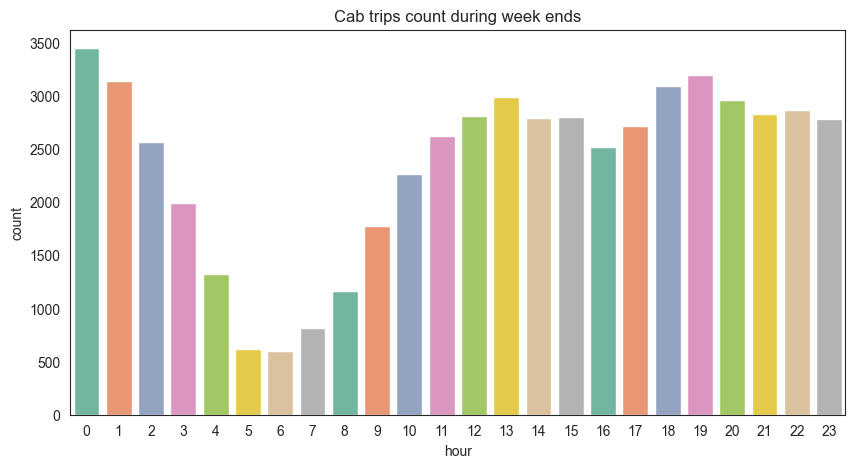

In [71]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot

plt.figure(figsize=(10,5))
plt.title('Cab trips count during week ends')
sns.set_style("white")

#plot the countplot for weekends

sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)], palette='Set2')

From the above plot, we can notice that the pattern for demand of Cab is different for weekdays and weekends.

### Mean fare for each hour during weekdays and weekends

We will check the mean fares for each hour during the weekdays and weekends.

### Compute the hourly mean fare for weekdays and weekends

In [72]:
# Set the days in the dataset as week days and week ends

week_days = df.loc[(df.dayofweek >= 0) & (df.dayofweek <= 4)]
week_ends = df.loc[(df.dayofweek >= 5) & (df.dayofweek <= 6)]

# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour

week_days_fare = week_days.groupby(['hour']).fare_amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).fare_amount.mean().to_frame().reset_index()


### 

Plot the mean fare

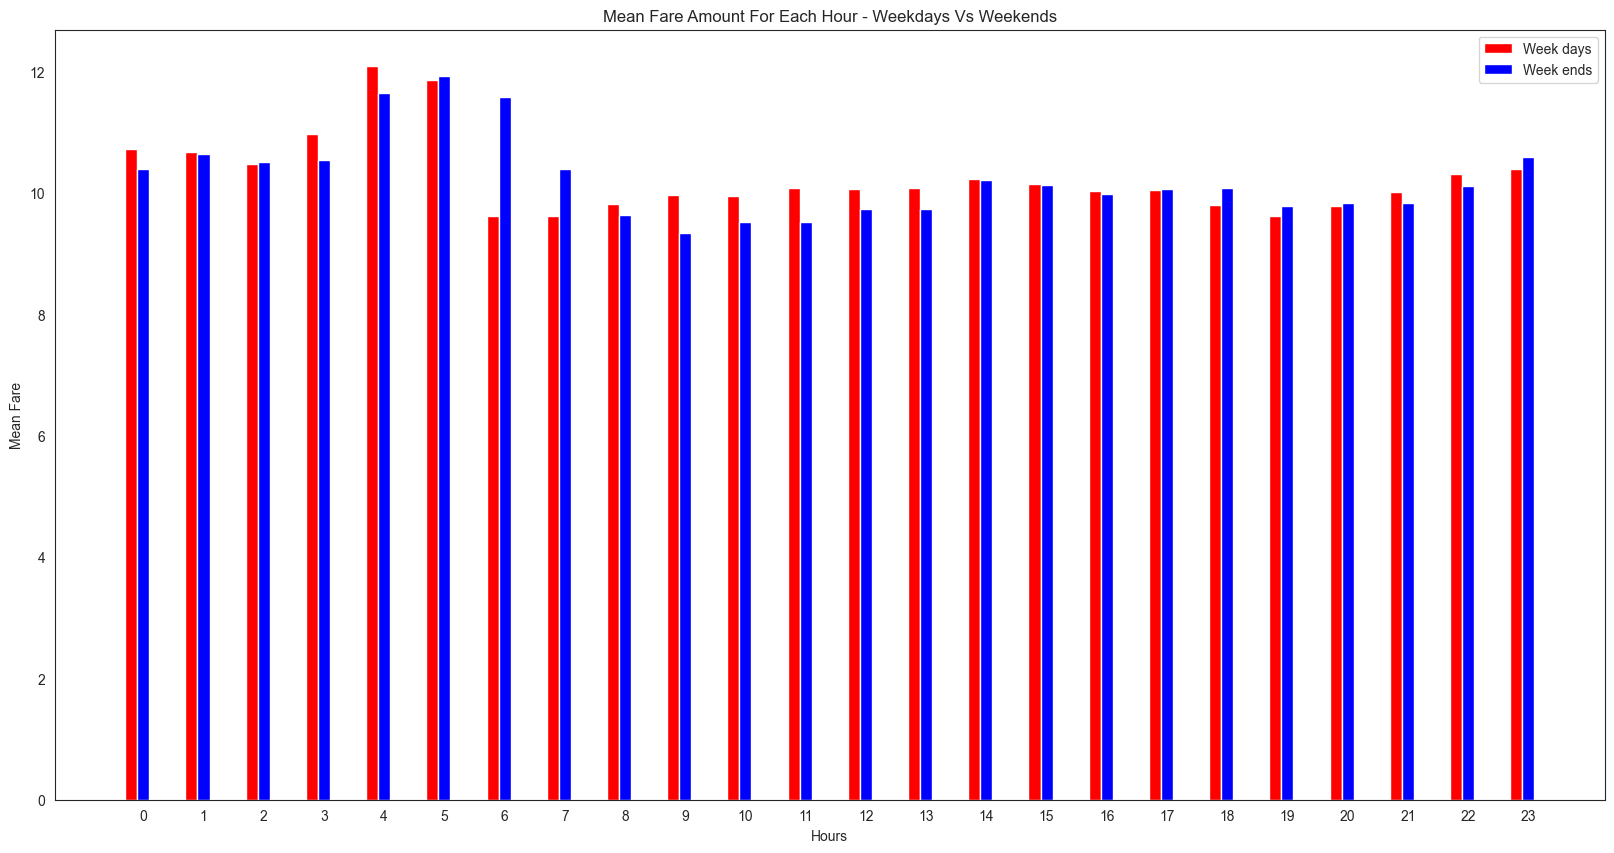

In [73]:
# hours

x=np.array(week_days_fare.hour)

# an array of week day fare 

y = np.array(week_days_fare.fare_amount)

# an array of week end fare

z = np.array(week_ends_fare.fare_amount)

# Set the figure size, title, x and y labels

plt.figure(figsize = (20,10))
plt.title('Mean Fare Amount For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')

# Pass the three integers. The value of these integer should be less that 10

ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()


We notice that the mean fares for each hour are different for week days and week ends.

### Distribution of key numerical vairables

#### We will check the distribustion of 'travel_dist_km' and 'amount'

#### Distribution of "fare_amount"

C:\Users\sande\AppData\Local\Temp\ipykernel_11248\102116063.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snsplot = sns.kdeplot(df.fare_amount, shade=True)


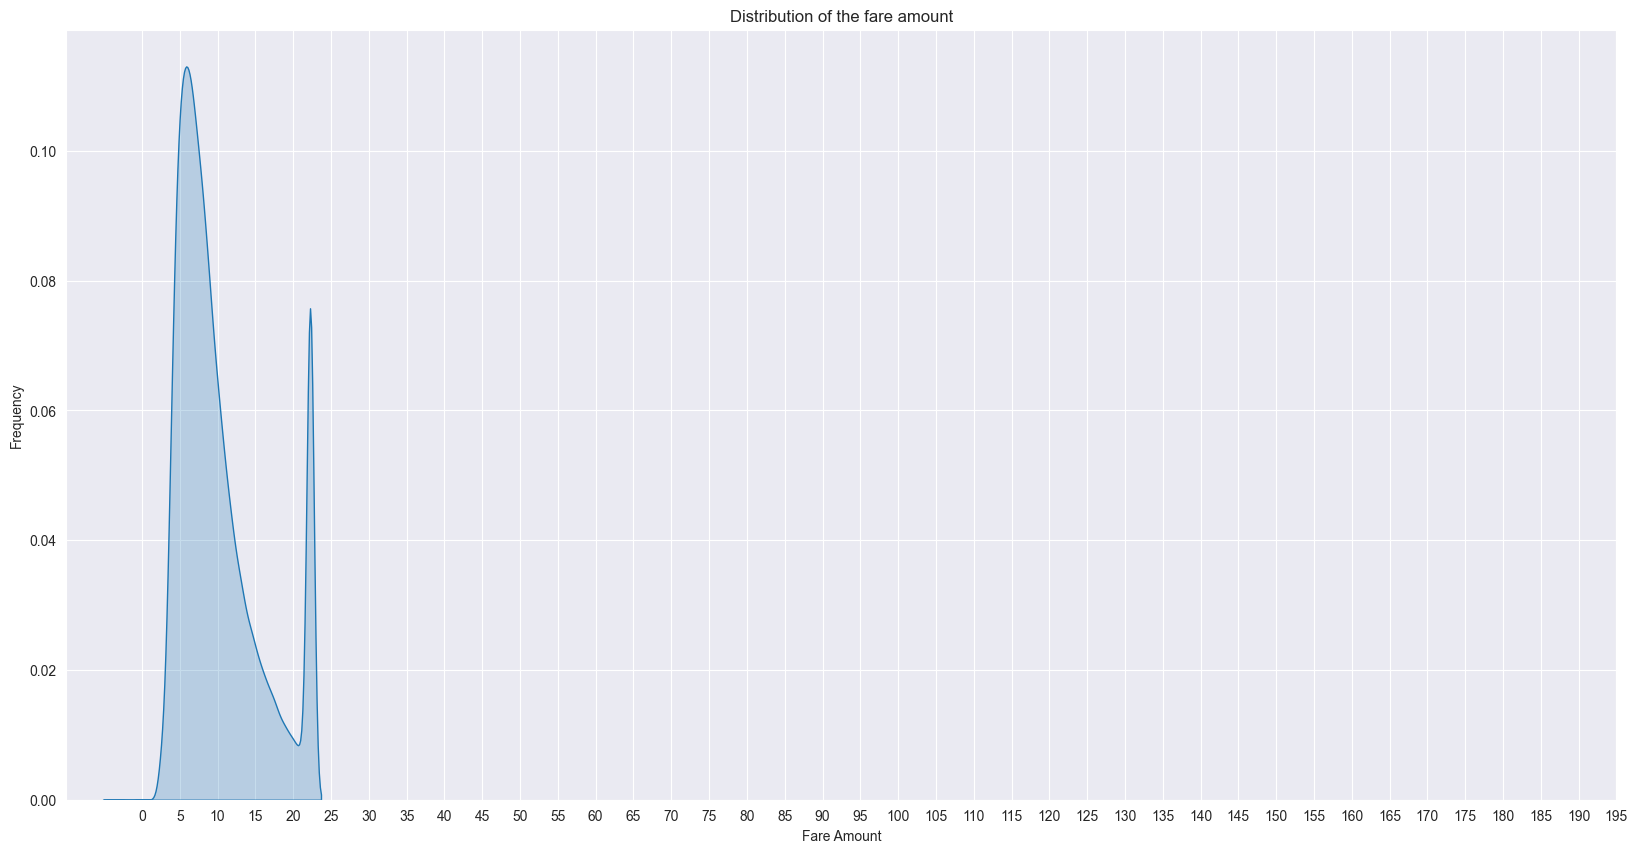

In [74]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0,200,5))

snsplot = sns.kdeplot(df.fare_amount, shade=True)

We can see that most the trips have a fare amount of 2 to 20 dollars. There are a few small peaks around 50 and 60 dollars as well.

#### Distribustion of the travel distance in km

C:\Users\sande\AppData\Local\Temp\ipykernel_11248\3293468093.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.plot = sns.kdeplot(df[df.dist_travel_km<600].dist_travel_km, shade=True)


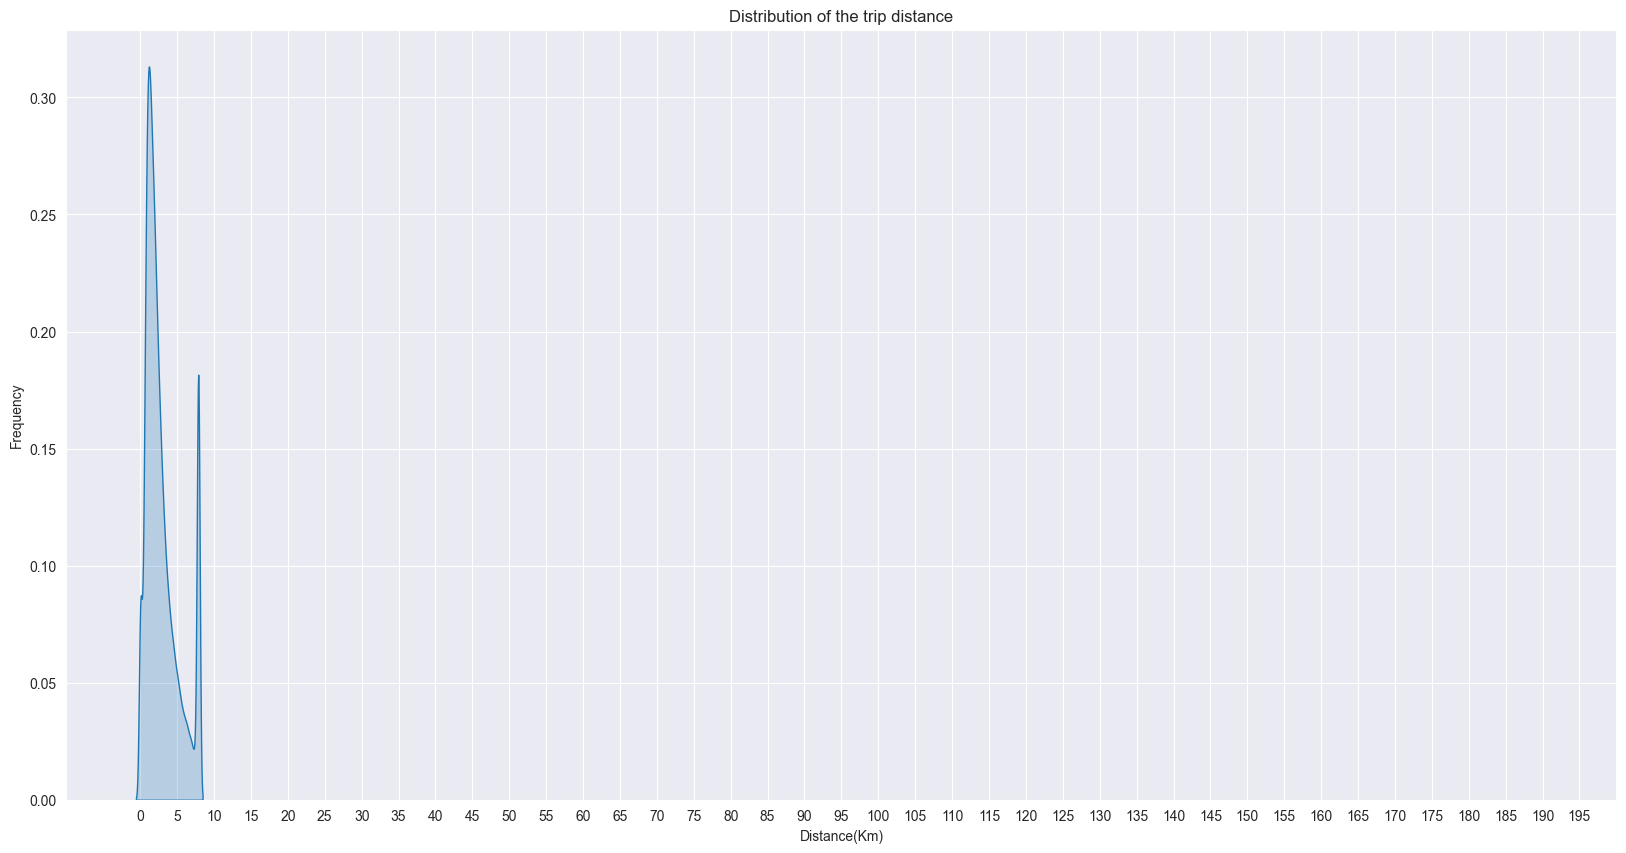

In [75]:
plt.figure(figsize = (20,10))
sns.style = ('darkgrid')
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-10, 200)
plt.xticks(range(0,200,5))

sns.plot = sns.kdeplot(df[df.dist_travel_km<600].dist_travel_km, shade=True)

We can see that most the trips have a travel distance of 2.5 km to 25 km. There are a few instances of 0 km as well.

### Models

#### 1. Split the data into features and target dataframes

split data into train data and test data 
what proportion of data should be included in test data is passed using 'test_size'
set 'random_state' to get the same data each time the code is executed 

In [76]:
# select only the target variable 'amount' and store it in dataframe 'y'

y = pd.DataFrame(df['fare_amount'])

In [77]:
# use 'drop()' to remove the variable 'amount' from df_taxi

# 'axis = 1' drops the corresponding column(s)

x = df.drop('fare_amount',axis = 1)

In [78]:
x.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude   
0        -73.999817        40.738354         -73.999512         40.723217  \
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.929786        40.744085         -73.973082         40.761247   

   passenger_count  hour  day  month  year  dayofweek  dist_travel_km  
0              1.0    19    7      5  2015          3        1.683323  
1              1.0    20   17      7  2009          4        2.457590  
2              1.0    21   24      8  2009          0        5.036377  
3              3.0     8   26      6  2009          4        1.661683  
4              3.5    17   28      8  2014          3        4.475450

#### 2. Split the data into training and test sets

1. split data into train subset and test subset for predictor and target variables
2. 'test_size' returns the proportion of data to be included in the test set
3. set 'random_state' to generate the same dataset each time you run the code 

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set

print("The shape of X_train is:",x_train.shape)

# print dimension of predictors test set

print("The shape of X_test is:",x_test.shape)

# print dimension of target train set

print("The shape of y_train is:",y_train.shape)

# print dimension of target test set

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (160000, 11)
The shape of X_test is: (40000, 11)
The shape of y_train is: (160000, 1)
The shape of y_test is: (40000, 1)


### 1. OLS

In [80]:
# build a full model using OLS()

# consider the log of sales price as the target variable

# use fit() to fit the model on train data

linreg_full = sm.OLS(y_train, x_train).fit()

# print the summary output

print(linreg_full.summary())

                                 OLS Regression Results                                
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.316e+05
Date:                Fri, 09 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:21:35   Log-Likelihood:                     -3.9082e+05
No. Observations:              160000   AIC:                                  7.817e+05
Df Residuals:                  159989   BIC:                                  7.818e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [81]:
linreg_full_predictions = linreg_full.predict(x_test)
linreg_full_predictions

49673      6.603702
171551     5.392640
5506       9.556665
38370      6.120483
36930      5.898239
167783     6.550270
67487      5.379843
101486     5.459060
131774     9.191484
48246      6.042613
147174     9.654700
72470      6.987368
20386     11.594687
6389       5.550622
171910    21.046466
105548     8.455285
180639     4.636522
155152     4.608688
140357     6.864859
177097    12.116263
12263      5.595775
69261      8.156789
83404     10.861450
176923    10.831793
76238     13.593779
193280     7.082767
173641     4.649529
31171     19.590649
192188     7.375421
36325     15.504517
156710    21.388743
196013     5.512395
44582      7.736967
159497     4.582785
139680     8.071664
42719     14.017418
54726      8.491581
118387     7.641413
74257     13.584362
48567      4.181088
85899      9.611888
165646     7.333189
97047     20.724212
63382     16.286695
116425    14.349527
149798     9.207409
133439     6.105310
5945       8.629982
182931    12.800002
150395    19.974356


In [82]:
actual_fare = y_test['fare_amount']

In [83]:
actual_fare

49673      4.00
171551     6.10
5506       8.50
38370      4.90
36930      6.50
167783     4.90
67487      8.50
101486     8.10
131774    12.50
48246      5.30
147174     9.00
72470      6.10
20386      7.30
6389       4.50
171910    22.25
105548    10.50
180639     3.70
155152     8.90
140357     6.50
177097    11.00
12263      5.30
69261     11.00
83404     10.00
176923     8.50
76238     17.30
193280    10.00
173641     3.70
31171     22.25
192188     7.30
36325     16.50
156710    22.25
196013     4.10
44582      7.30
159497     4.50
139680     6.50
42719     11.00
54726      7.30
118387     5.50
74257     11.50
48567      4.00
85899     10.50
165646     6.50
97047     22.25
63382     15.70
116425    15.50
149798     9.00
133439     6.50
5945       9.70
182931    14.00
150395    22.25
11448      4.10
55287     14.10
151206    15.50
34460     10.90
36962     15.30
45406      8.50
68796      4.50
87458      7.30
128254    13.00
78823      8.00
54624     22.25
95708     12.50
98397   

In [84]:
linreg_full_rmse = (rmse(actual_fare, linreg_full_predictions))

In [85]:
# calculate rmse using rmse()

linreg_full_rmse = rmse(actual_fare,linreg_full_predictions )

# calculate R-squared using rsquared

linreg_full_rsquared = linreg_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj

linreg_full_rsquared_adj = linreg_full.rsquared_adj 

In [86]:
# create the result table for all accuracy scores

# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value

# create a list of column names

cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums

# columns: specifies the columns to be selected

result_tabulation = pd.DataFrame(columns = cols)



In [87]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linreg full model ",
                     'RMSE':linreg_full_rmse,
                     'R-Squared': linreg_full_rsquared,
                     'Adj. R-Squared': linreg_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name

In [88]:
#result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)
result_tabulation = pd.concat([result_tabulation, linreg_full_metrics], ignore_index=True)
# print the result table
result_tabulation

Model RMSE R-Squared Adj. R-Squared                   0
0   NaN  NaN       NaN            NaN  Linreg full model 
1   NaN  NaN       NaN            NaN            2.759165
2   NaN  NaN       NaN            NaN            0.940918
3   NaN  NaN       NaN            NaN            0.940914

### 2. Linear Regression with SGD

In [89]:


# importing library min max scaler to scale data
from sklearn.preprocessing import MinMaxScaler
#import library for implement Linear Regression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [90]:
scaler= StandardScaler()

In [91]:
scaler.fit(x)

StandardScaler()

In [92]:
x1= scaler.fit_transform(x)
x1

array([[-1.04868902, -0.46151906, -1.0192181 , ...,  1.75477984,
        -0.02487235, -0.52650319],
       [-0.78236166, -0.85626623, -0.80934622, ..., -1.4772954 ,
         0.48875385, -0.17831722],
       [-1.30351906, -0.3673497 ,  0.59563646, ..., -1.4772954 ,
        -1.56575094,  0.98135692],
       ...,
       [-0.37579257,  0.24518925,  2.36704776, ..., -1.4772954 ,
        -1.56575094,  2.25339824],
       [-0.91736709, -0.96432192, -0.3069412 , ...,  1.75477984,
        -0.53849854,  0.30831192],
       [-0.29670226, -1.17381839, -0.40714834, ..., -0.9386162 ,
         1.00238004,  1.15287437]])

In [93]:
y1=y

In [94]:
# split data into train data and test data 

# what proportion of data should be included in test data is passed using 'test_size'

# set 'random_state' to get the same data each time the code is executed 

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set

print("The shape of X1_train is:",x1_train.shape)

# print dimension of predictors test set

print("The shape of X1_test is:",x1_test.shape)

# print dimension of target train set

print("The shape of y1_train is:",y1_train.shape)

# print dimension of target test set

print("The shape of y1_test is:",y1_test.shape)


The shape of X1_train is: (160000, 11)
The shape of X1_test is: (40000, 11)
The shape of y1_train is: (160000, 1)
The shape of y1_test is: (40000, 1)


In [95]:
from sklearn.linear_model import SGDRegressor

In [96]:
SGD_MODEL = SGDRegressor()

In [97]:
SGD_MODEL.fit(x_train, y_train)

C:\Users\sande\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [98]:
# build the model

SGD_model = SGDRegressor(loss="squared_error",alpha = 0.0001, max_iter = 1000) #Instantiation

# fit the model

SGD_model.fit(x1_train, y1_train) #Training

C:\Users\sande\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [99]:
# predict the values
y1_pred_SGD  = SGD_model.predict(x1_test)
y1_pred_SGD

array([ 6.16819963,  4.98642619,  9.42667678, ..., 10.94975325,
       12.15748673, 11.47045775])

In [100]:
r_squared_SGD = SGD_model.score(x1_train,y1_train)

# Number of observation or sample size

n = 159999 

# No of independent variables

p = 11

#Compute Adj-R-Squared

Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE

rmse_SGD = sqrt(mean_squared_error(y1_test, y1_pred_SGD))

In [101]:
# compile the required information

linreg_full_metrics = pd.Series({'Model': "Linear regression with SGD",
                     'RMSE':rmse_SGD,
                     'R-Squared': r_squared_SGD,
                     'Adj. R-Squared': Adj_r_squared_SGD     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
#result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)
result_tabulation = pd.concat([result_tabulation, linreg_full_metrics], ignore_index=True)

# print the result table
result_tabulation

Model RMSE R-Squared Adj. R-Squared                           0
0   NaN  NaN       NaN            NaN          Linreg full model 
1   NaN  NaN       NaN            NaN                    2.759165
2   NaN  NaN       NaN            NaN                    0.940918
3   NaN  NaN       NaN            NaN                    0.940914
4   NaN  NaN       NaN            NaN  Linear regression with SGD
5   NaN  NaN       NaN            NaN                    2.707565
6   NaN  NaN       NaN            NaN                    0.746791
7   NaN  NaN       NaN            NaN                    0.746774

### 3. Decision Tree

In [102]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [103]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'squared_error', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(x_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'


In [104]:
y_pred_DT=decision_tree_model.predict(x_test)

In [105]:
y_pred_DT

array([ 6. ,  6.1,  9. , ..., 10. , 10.9, 12. ])

In [106]:
y_test

fare_amount
49673          4.00
171551         6.10
5506           8.50
38370          4.90
36930          6.50
167783         4.90
67487          8.50
101486         8.10
131774        12.50
48246          5.30
147174         9.00
72470          6.10
20386          7.30
6389           4.50
171910        22.25
105548        10.50
180639         3.70
155152         8.90
140357         6.50
177097        11.00
12263          5.30
69261         11.00
83404         10.00
176923         8.50
76238         17.30
193280        10.00
173641         3.70
31171         22.25
192188         7.30
36325         16.50
156710        22.25
196013         4.10
44582          7.30
159497         4.50
139680         6.50
42719         11.00
54726          7.30
118387         5.50
74257         11.50
48567          4.00
85899         10.50
165646         6.50
97047         22.25
63382         15.70
116425        15.50
149798         9.00
133439         6.50
5945           9.70
182931        14.00
150395        22.25
11448          4.10
55287         14.10
151206        15.50
34460         10.90
36962         15.30
45406          8.50
68796          4.50
87458          7.30
128254        13.00
78823          8.00
54624         22.25
95708         12.50
98397          8.90
89501          8.90
25275         22.25
199829        22.25
89782         15.50
27145          4.90
42792          7.30
196871         9.70
160102         8.10
26264          6.10
7553          12.10
92333          9.70
24546          8.50
33678          3.00
38134         22.25
174037        22.25
193142        18.50
8667           7.00
57454         12.00
50076          8.90
196575         5.70
59414          5.50
18444          5.70
78292         11.00
31283          8.90
172306         4.50
21049          6.10
77180         22.25
162825        22.25
23604         14.90
68734          4.10
45553         14.00
160409         4.50
148412         7.00
93225         14.50
181828         9.50
41444          4.50
45393         12.00
160551         9.00
80378          8.50
47587          6.00
95755          6.10
34345         12.00
183866        14.10
12635          5.00
19640          3.30
98229          8.10
98859         13.70
41048         10.00
136569         3.50
175127        10.00
102652        10.10
114587        19.00
167376         6.50
84674          7.30
17731          8.10
153242        19.00
190016        13.30
166150         6.00
128175        16.00
69706         12.50
116466         6.90
46560          8.00
191494         9.30
80903         10.10
33472          5.50
192179         6.90
33815          7.30
93796         10.00
32651         15.00
19127         10.50
29351          5.70
105119         6.00
5459           4.50
172835         4.50
49178          4.50
159425         4.50
126130        22.25
112107         6.00
167130        13.30
6070          17.30
8202           8.90
178135         6.10
19641         14.10
145270         5.30
22942          6.50
189673        22.25
180310         4.00
179421        10.50
133412         4.90
174648         6.50
45148          8.10
78394          8.90
153525         9.50
158880         2.50
27487         15.40
102742         8.50
38150          5.70
197534         5.30
26956         11.50
47108         16.50
164627         5.00
76904          6.20
96931          9.00
81885         10.10
89491          5.50
60112          8.10
24175          6.50
75258         10.10
112573         7.70
124403         5.00
88844          6.90
1862           7.00
86897          6.50
21952          4.00
77723         22.25
125387         4.10
104635         7.00
99023          6.50
172170        11.70
115407         8.00
119031        11.70
191051         5.30
49278          4.50
25802          9.00
154337         6.10
100628        18.10
47546         11.00
11562          8.50
169543         6.10
46378          8.10
118155        22.25
62137          7.50
132344         6.50
168966        14.10
84315          7.50
136579         5.30
12478   

In [107]:
r_squared_DT=decision_tree_model.score(x_test,y_test)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)
Adj_r_squared_DT

0.6089721394803227

In [108]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

In [109]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model ",
                     'RMSE':rmse_DT,
                     'R-Squared': r_squared_DT,
                     'Adj. R-Squared': Adj_r_squared_DT     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = pd.concat([result_tabulation, linreg_full_metrics], ignore_index=True)

# print the result table
result_tabulation

Model RMSE R-Squared Adj. R-Squared                           0
0    NaN  NaN       NaN            NaN          Linreg full model 
1    NaN  NaN       NaN            NaN                    2.759165
2    NaN  NaN       NaN            NaN                    0.940918
3    NaN  NaN       NaN            NaN                    0.940914
4    NaN  NaN       NaN            NaN  Linear regression with SGD
5    NaN  NaN       NaN            NaN                    2.707565
6    NaN  NaN       NaN            NaN                    0.746791
7    NaN  NaN       NaN            NaN                    0.746774
8    NaN  NaN       NaN            NaN        Decision Tree Model 
9    NaN  NaN       NaN            NaN                    3.408304
10   NaN  NaN       NaN            NaN                    0.608999
11   NaN  NaN       NaN            NaN                    0.608972

### Decision Tree with pruning

In [110]:
# instantiate the 'DecisionTreeRegressor' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 32 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)

In [111]:
y_pred_DT_prune=decision_tree_prune.predict(x_test)

In [112]:
y_pred_DT_prune

array([ 4.99914948,  5.67888429,  9.75463978, ..., 11.96624034,
       11.08746429, 11.08746429])

In [113]:
r_squared_DT_prune=decision_tree_prune.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT_prune = 1 - (1-r_squared_DT_prune)*(n-1)/(n-p-1)
Adj_r_squared_DT_prune
# Compute RMSE
rmse_DT_prune = sqrt(mean_squared_error(y_test, y_pred_DT_prune))

In [114]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model after pruning ",
                     'RMSE':rmse_DT_prune,
                     'R-Squared': r_squared_DT_prune,
                     'Adj. R-Squared': Adj_r_squared_DT_prune     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = pd.concat([result_tabulation, linreg_full_metrics], ignore_index=True)

# print the result table
result_tabulation

Model RMSE R-Squared Adj. R-Squared                                   0
0    NaN  NaN       NaN            NaN                  Linreg full model 
1    NaN  NaN       NaN            NaN                            2.759165
2    NaN  NaN       NaN            NaN                            0.940918
3    NaN  NaN       NaN            NaN                            0.940914
4    NaN  NaN       NaN            NaN          Linear regression with SGD
5    NaN  NaN       NaN            NaN                            2.707565
6    NaN  NaN       NaN            NaN                            0.746791
7    NaN  NaN       NaN            NaN                            0.746774
8    NaN  NaN       NaN            NaN                Decision Tree Model 
9    NaN  NaN       NaN            NaN                            3.408304
10   NaN  NaN       NaN            NaN                            0.608999
11   NaN  NaN       NaN            NaN                            0.608972
12   NaN  NaN       NaN            NaN  Decision Tree Model after pruning 
13   NaN  NaN       NaN            NaN                            2.583032
14   NaN  NaN       NaN            NaN                            0.775425
15   NaN  NaN       NaN            NaN                             0.77541

### 5. RandomForestRegressor

In [115]:
# import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [116]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(x_train, y_train)

C:\Users\sande\AppData\Local\Temp\ipykernel_11248\854013030.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

In [117]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(x_test)

In [118]:
y_pred_RF

array([ 4.767 ,  6.76  ,  8.97  , ..., 11.0275, 11.68  , 13.835 ])

In [119]:
r_squared_RF = rf_reg.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)
Adj_r_squared_RF
# Compute RMSE
rmse_RF = sqrt(mean_squared_error(y_test, y_pred_RF))

In [120]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 1.490655997827381
Mean Squared Error (MSE): 5.58569781726495
Root Mean Squared Error (RMSE): 2.3634080936784807


In [121]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest ",
                     'RMSE':rf_reg_RMSE,
                     'R-Squared': r_squared_RF,
                     'Adj. R-Squared': Adj_r_squared_RF     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = pd.concat([result_tabulation, linreg_full_metrics], ignore_index=True)

# print the result table
result_tabulation

Model RMSE R-Squared Adj. R-Squared                                   0
0    NaN  NaN       NaN            NaN                  Linreg full model 
1    NaN  NaN       NaN            NaN                            2.759165
2    NaN  NaN       NaN            NaN                            0.940918
3    NaN  NaN       NaN            NaN                            0.940914
4    NaN  NaN       NaN            NaN          Linear regression with SGD
5    NaN  NaN       NaN            NaN                            2.707565
6    NaN  NaN       NaN            NaN                            0.746791
7    NaN  NaN       NaN            NaN                            0.746774
8    NaN  NaN       NaN            NaN                Decision Tree Model 
9    NaN  NaN       NaN            NaN                            3.408304
10   NaN  NaN       NaN            NaN                            0.608999
11   NaN  NaN       NaN            NaN                            0.608972
12   NaN  NaN       NaN            NaN  Decision Tree Model after pruning 
13   NaN  NaN       NaN            NaN                            2.583032
14   NaN  NaN       NaN            NaN                            0.775425
15   NaN  NaN       NaN            NaN                             0.77541
16   NaN  NaN       NaN            NaN                      Random Forest 
17   NaN  NaN       NaN            NaN                            2.363408
18   NaN  NaN       NaN            NaN                            0.811991
19   NaN  NaN       NaN            NaN                            0.811978

In [128]:
import pickle
pickle.dump(rf_reg, open('rf_reg.pkl','wb'))

model = pickle.load(open('rf_reg.pkl','rb'))
print(model.predict(x_test))

[ 4.767   6.76    8.97   ... 11.0275 11.68   13.835 ]
